# Sweeping two things at once

This example notebook shows how to sweep two parameters in one go

## Setting up the dummy experiment

Our dummy experiment consists of a DAC and a DMM. The DAC has two channels each connected to one port of the DMM. One Port measures the square of the DAC voltage, the other measures the cube of the DAC voltage (this is my understanding of a physical system!)

In [1]:
import qcodes as qc
from qcodes.utils.wrappers import init, do1d
from qcodes.tests.instrument_mocks import DummyInstrument

/Users/william/sourcecodes/qdev-dk/qcodes/instrument/parameter.py:1315: UserWarning: Parameter single: `ManualParameter` is deprecated, use `Parameter` instead with `set_cmd=None`.
  '`Parameter` instead with `set_cmd=None`.'.format(self))


In [2]:
dac = DummyInstrument('dac', gates=['ch1', 'ch2'])
dmm = DummyInstrument('dmm', gates=['v1', 'v2'])

station = qc.Station(dac, dmm)

In [3]:
init('./sandboxdata', 'sandboxsample', station, annotate_image=False)

Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/commands.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [4]:
# set up some simulated wiring and physical system between the dac and dmm
dmm.v1.get = lambda: dac.ch1.get()**2
dmm.v2.get = lambda: dac.ch2.get()**3

### Check that this makes sense

Started at 2017-10-17 11:13:32
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/049'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (25,)
   Measured | dmm_v1      | v1           | (25,)
Finished at 2017-10-17 11:13:35


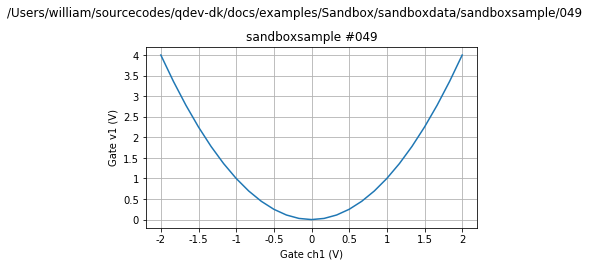

(<qcodes.plots.pyqtgraph.QtPlot at 0x10921d2e8>, DataSet:
    location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/049'
    <Type>   | <array_id>  | <array.name> | <array.shape>
    Setpoint | dac_ch1_set | ch1          | (25,)
    Measured | dmm_v1      | v1           | (25,))

In [6]:
do1d(dac.ch1, -2, 2, 25, 0.1, dmm.v1)

Started at 2017-10-17 11:14:13
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/050'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch2_set | ch2          | (25,)
   Measured | dmm_v2      | v2           | (25,)
Finished at 2017-10-17 11:14:16


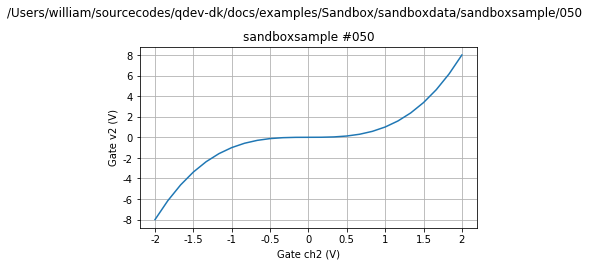

(<qcodes.plots.pyqtgraph.QtPlot at 0x10f9d2c88>, DataSet:
    location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/050'
    <Type>   | <array_id>  | <array.name> | <array.shape>
    Setpoint | dac_ch2_set | ch2          | (25,)
    Measured | dmm_v2      | v2           | (25,))

In [7]:
do1d(dac.ch2, -2, 2, 25, 0.1, dmm.v2)

## Simultaneously sweep both in opposite directions

Now let's sweep both voltages in opposite directions simultaneously

In [8]:
# Define the mapping from one param two the two voltages

def combi_setter(value):
    dac.ch1.set(value)
    dac.ch2.set(-value)
    

In [13]:
# And simply add this as a new parameter two the instrument

dac.add_parameter('combi',
                  label='Dac Ch1 and minus Dac Ch2',
                  set_cmd=combi_setter)

KeyError: 'Duplicate parameter name combi'

### Sweep and see that we get the expected traces

Started at 2017-10-17 11:17:19
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/051'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | dac_combi_set | combi        | (50,)
   Measured | dmm_v1        | v1           | (50,)
   Measured | dmm_v2        | v2           | (50,)
Finished at 2017-10-17 11:17:32


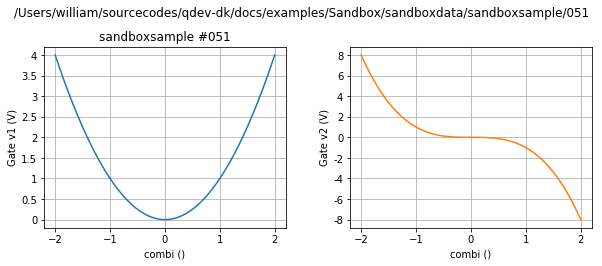

(<qcodes.plots.pyqtgraph.QtPlot at 0x10fbaa240>, DataSet:
    location = '/Users/william/sourcecodes/qdev-dk/docs/examples/Sandbox/sandboxdata/sandboxsample/051'
    <Type>   | <array_id>    | <array.name> | <array.shape>
    Setpoint | dac_combi_set | combi        | (50,)
    Measured | dmm_v1        | v1           | (50,)
    Measured | dmm_v2        | v2           | (50,))

In [11]:
do1d(dac.combi, -2, 2, 50, 0.2, dmm.v1, dmm.v2, use_threads=False)

# NOTE:

The "raw" channel values do NOT go in to the dataset. You must **separately** keep track of what `dac_combi` means.